Shri Ramdeobaba College of Engineering and Management, Nagpur

Name: Yash Patni

Roll No.:71

Sec: A

Subject : Design Analysis and Algorithms Lab

Practical No. : 02

**Aim**: Construction of Minimum Spanning Tree

**Problem Statement:** A telecommunications organization has offices spanned across multiple locations around the globe. It has to use leased
phone lines for connecting all these offices with each other. The organization, wants to use minimum cost for connecting all its offices. This
requires that all the offices should be connected using a minimum number of leased lines so as to reduce the effective cost. A. Consider the
following for deciding connections in same state in India: i. Find the latitude and longitude of cities in same state. Consider 4 to 6 cities. ii.
Calculate the cost of connecting each pair of offices by computing the distance between different pair of different cities (as considered in part
A) and construct a fully connected graph. iii. Compute a minimum spanning tree using either Prims or Kruskals Method to find the cost of
connecting offices in different cities.

In [ ]:
def coordinates(city):
 from geopy.geocoders import Nominatim
 geolocator = Nominatim(user_agent="MyApp")
 location = geolocator.geocode(city)
 return location.latitude,location.longitude

In [ ]:
def dist(city1, city2):
 from geopy.distance import geodesic as gd
 x1,y1=coordinates(city1)
 x2,y2=coordinates(city2)
 l1=(x1,y1)
 l2=(x2,y2)
 distance=(gd(l1,l2).km)
 return distance

In [ ]:
def city_mat():
  import networkx as nx
  import matplotlib.pyplot as plt
  city_names = []
  num_cities = int(input("Enter the number of cities between 4 to 6: "))
  print("----------------------------------------------------------------------------------")
  for i in range(num_cities):
      city_name = input(f"Enter city {i+1} and state (e.g.: City, State): ")
      city_names.append(city_name)

  distance_matrix=[]
  z=0
  for i in city_names:
    distance_matrix.append([])
    for j in city_names:
      distance_matrix[z].append(dist(i,j))
    z+=1
  length=len(city_names)

  return num_cities,distance_matrix

In [ ]:
def prims_algo():
  INF = 9999999
  V,M=city_mat()
  selected = [0]*V
  count = 0
  selected[0] = True
  cost=0
  print(f'For cities state:')
  print("Edge : Weight")
  while (count < V - 1):
      minimum = INF
      x = 0
      y = 0
      for i in range(V):
          if selected[i]:
              for j in range(V):
                  if ((not selected[j]) and M[i][j]):
                      if minimum > M[i][j]:
                          minimum = M[i][j]
                          x = i
                          y = j
      print(str(x) + "-" + str(y) + ":" + str(M[x][y]))
      cost+=M[x][y]
      selected[y] = True
      count += 1
  print(f"Cost is: {cost}\n")

In [ ]:
A=[0,0,0]
for i in range(3):
  import time as t
  start=t.perf_counter()
  prims_algo()
  end= t.perf_counter()
  timetaken=end-start
  print("Time taken is: ",timetaken)
  A[i]=timetaken

Enter the number of cities between 4 to 6: 4
----------------------------------------------------------------------------------
Enter city 1 and state (e.g.: City, State): Nagpur
Enter city 2 and state (e.g.: City, State): Wardha
Enter city 3 and state (e.g.: City, State): Akola
Enter city 4 and state (e.g.: City, State): Yavatmal
For cities state:
Edge : Weight
0-1:71.34502317873158
1-3:64.27879742210314
3-2:114.23228177864594
Cost is: 249.85610237948066

Time taken is:  37.80688329199998
Enter the number of cities between 4 to 6: 5
----------------------------------------------------------------------------------
Enter city 1 and state (e.g.: City, State): Nagpur
Enter city 2 and state (e.g.: City, State): Wardha
Enter city 3 and state (e.g.: City, State): Pune
Enter city 4 and state (e.g.: City, State): Akola
Enter city 5 and state (e.g.: City, State): Yavatmal
For cities state:
Edge : Weight
0-1:71.34502317873158
1-4:64.27879742210314
4-3:114.23228177864594
3-2:418.66300434813365
C

For cities state:
Edge : Weight
0-4:71.34502317873158
4-1:151.23949106977008
1-5:206.5153816525215
5-3:216.56124085661867
3-2:119.22916693804272
Cost is: 764.8903036956845

Time taken is:  81.24943821400001


[37.80688329199998, 68.431345572, 81.24943821400001]


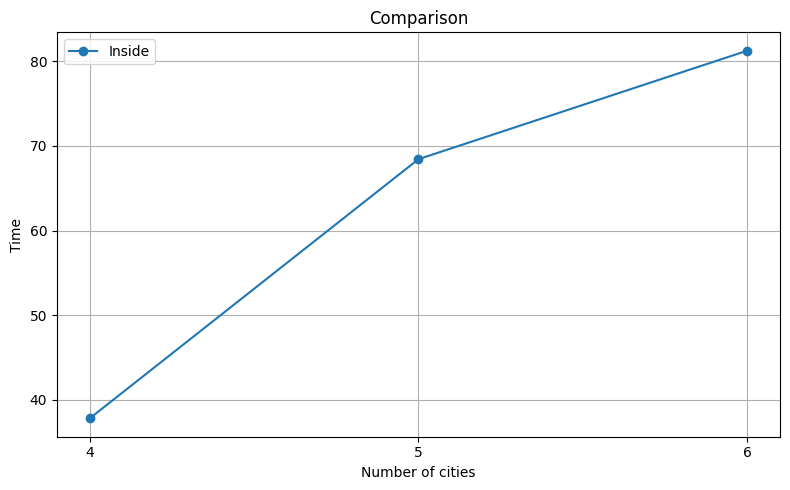

In [ ]:
print(A)

import matplotlib.pyplot as plt
x_labels = ['4', '5','6']

plt.figure(figsize=(8, 5))
plt.plot(x_labels, A, marker='o', label='Inside', linestyle='-')

plt.xlabel('Number of cities')
plt.ylabel('Time')
plt.title('Comparison')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()
